In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Import/Explore Grocery Sales Data

source: https://www.kaggle.com/c/favorita-grocery-sales-forecasting

In [2]:
# import data
items = pd.read_csv('/Users/paigemcdonald/Documents/GitHub_data/predicting-sales/data/items.csv') # item information
stores = pd.read_csv('/Users/paigemcdonald/Documents/GitHub_data/predicting-sales/data/stores.csv') # store information
train = pd.read_csv('/Users/paigemcdonald/Documents/GitHub_data/predicting-sales/data/train.csv', index_col = [0]) # transactions data
holiday_events = pd.read_csv('/Users/paigemcdonald/Documents/GitHub_data/predicting-sales/data/holidays_events.csv') # holiday dates

1) Inspect items data

In [3]:
# number of rows and columns in items
print('Number of rows in items:',items.shape[0])
print('Number of columns in items:',items.shape[1])

Number of rows in items: 4100
Number of columns in items: 4


In [4]:
# first 5 rows of items
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [5]:
# data types in items
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
item_nbr      4100 non-null int64
family        4100 non-null object
class         4100 non-null int64
perishable    4100 non-null int64
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


In [6]:
# how many different item families are there?
print('Number of unique item families:' ,items['family'].nunique())

Number of unique item families: 33


In [7]:
# what are the families called?
items['family'].unique()

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES',
       'SEAFOOD', 'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY',
       'HARDWARE', 'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'],
      dtype=object)

In [8]:
# which families are perishable? - I will only focus on these products
items[items['perishable'] == 1].family.unique()

array(['BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS', 'DAIRY', 'MEATS',
       'SEAFOOD', 'PREPARED FOODS', 'PRODUCE'], dtype=object)

In [9]:
# which items are perishable? - use list to filter perishable items from transaction data
items_perish = items[items['perishable'] == 1].item_nbr.unique()

In [10]:
# how many different items are in each perishable family?
items[items['perishable'] == 1].groupby('family').item_nbr.count()

family
BREAD/BAKERY      134
DAIRY             242
DELI               91
EGGS               41
MEATS              84
POULTRY            54
PREPARED FOODS     26
PRODUCE           306
SEAFOOD             8
Name: item_nbr, dtype: int64

In [11]:
# drop 'class' column because I do not need it for my analysis
items.drop(columns = ['class'], inplace = True)

In [12]:
# check for missing values 
np.mean(items.isna(), axis = 0)

item_nbr      0.0
family        0.0
perishable    0.0
dtype: float64

2) Inspect stores data

In [13]:
# number of rows and columns in stores
print('Number of rows in stores:',stores.shape[0])
print('Number of columns in stores:',stores.shape[1])

Number of rows in stores: 54
Number of columns in stores: 5


In [14]:
# first 5 rows of stores
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
# data types in stores
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
store_nbr    54 non-null int64
city         54 non-null object
state        54 non-null object
type         54 non-null object
cluster      54 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [16]:
# number of unique stores
print('Number of unique stores:',stores['store_nbr'].nunique())

Number of unique stores: 54


In [17]:
# how many stores are in each city,state?
stores.groupby(['city','state']).size().reset_index().rename(columns={0:'count'})

,city,state,count
0,Ambato,Tungurahua,2
1,Babahoyo,Los Rios,1
2,Cayambe,Pichincha,1
3,Cuenca,Azuay,3
4,Daule,Guayas,1
5,El Carmen,Manabi,1
6,Esmeraldas,Esmeraldas,1
7,Guaranda,Bolivar,1
8,Guayaquil,Guayas,8
9,Ibarra,Imbabura,1


In [18]:
# drop 'type' and 'cluster' columns because I do not need it for my analysis
stores.drop(columns = ['type','cluster'], inplace = True)

In [19]:
# check for missing values 
np.mean(stores.isna(), axis = 0)

store_nbr    0.0
city         0.0
state        0.0
dtype: float64

3) Inspect train data

In [20]:
# Number of rows and columns in train
print('Number of rows in train:',train.shape[0])
print('Number of columns in train:',train.shape[1])

Number of rows in train: 125497040
Number of columns in train: 5


In [21]:
# first 5 rows in train
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [22]:
# data types in train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
date           object
store_nbr      int64
item_nbr       int64
unit_sales     float64
onpromotion    object
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ GB


In [23]:
# date range in train
print('Start date:', train['date'].min())
print('End date:', train['date'].max())

Start date: 2013-01-01
End date: 2017-08-15


In [24]:
# check for missing values
np.mean(train.isna(), axis = 0)

date           0.000000
store_nbr      0.000000
item_nbr       0.000000
unit_sales     0.000000
onpromotion    0.172575
dtype: float64

Finding: 17% of 'onpromotion' column is NaN - will look into this later when merged with other data for more information

In [25]:
# only keep item_nbr's that are perishable
train = train[train['item_nbr'].isin(items_perish)]

4) Inspect holiday_events data

In [26]:
# number of rows and columns in holiday_events
print('Number of rows in holiday_events:',holiday_events.shape[0])
print('Number of columns in holiday_events:',holiday_events.shape[1])

Number of rows in holiday_events: 350
Number of columns in holiday_events: 6


In [27]:
# first 5 rows in holiday_events - starts in 2012 but there are no sales data during that time
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [28]:
# data types in holiday_events
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
date           350 non-null object
type           350 non-null object
locale         350 non-null object
locale_name    350 non-null object
description    350 non-null object
transferred    350 non-null bool
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [29]:
# check for missing values
np.mean(holiday_events.isna(), axis = 0)

date           0.0
type           0.0
locale         0.0
locale_name    0.0
description    0.0
transferred    0.0
dtype: float64

In [30]:
# what are the holiday types?
holiday_events['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [31]:
# how many counts are there of each holiday type?
holiday_events['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Work Day        5
Bridge          5
Name: type, dtype: int64

In [32]:
# when the transferred column = True then that day is not actually a holiday and the holiday was moved to a different day
holiday_events['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [33]:
# drop dates where the holiday was transferred to another date
holiday_events = holiday_events[holiday_events['transferred'] != True]

In [34]:
# don't need column 'description' and 'transferred' anymore
holiday_events.drop(columns = ['description', 'transferred'], inplace = True)

# Merged Grocery Store Datasets

Faster to do merges one by one

In [35]:
# full merge train and stores on 'store_nbr'
train_stores = pd.merge(train, stores, on = 'store_nbr', how = 'outer')

In [36]:
# full merge train_stores with items on 'item_nbr'
train_stores_items = pd.merge(train_stores, items, on = 'item_nbr', how = 'outer')

In [37]:
# full merge train_stores_items with holiday_events on 'date'
sales = pd.merge(train_stores_items, holiday_events, on = 'date', how = 'outer')

In [38]:
# first 5 rows of sales
sales.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,family,perishable,type,locale,locale_name
0,2013-01-01,25.0,103665.0,7.0,NaN,Salinas,Santa Elena,BREAD/BAKERY,1.0,Holiday,National,Ecuador
1,2013-01-01,25.0,108701.0,1.0,NaN,Salinas,Santa Elena,DELI,1.0,Holiday,National,Ecuador
2,2013-01-01,25.0,129635.0,11.0,NaN,Salinas,Santa Elena,DAIRY,1.0,Holiday,National,Ecuador
3,2013-01-01,25.0,153239.0,3.0,NaN,Salinas,Santa Elena,BREAD/BAKERY,1.0,Holiday,National,Ecuador
4,2013-01-01,25.0,153395.0,7.0,NaN,Salinas,Santa Elena,BREAD/BAKERY,1.0,Holiday,National,Ecuador


In [39]:
# number of rows and columns in sales (all stores)
print('Number of rows in sales:',sales.shape[0])
print('Number of columns in sales:',sales.shape[1])

Number of rows in sales: 32332061
Number of columns in sales: 12


For now I will just look at 5 stores that have the largest number of sales that are in 5 different cities.

In [40]:
# get count of sales for each store
sales['store_nbr'].value_counts()

44.0    963115
49.0    952631
45.0    944699
8.0     939593
47.0    935618
3.0     932835
46.0    906940
50.0    875363
48.0    869469
2.0     863790
6.0     862932
7.0     862168
51.0    853500
4.0     827041
24.0    821334
27.0    801148
37.0    778298
1.0     776132
38.0    709181
5.0     708103
23.0    707420
41.0    688024
39.0    650715
9.0     640319
25.0    608991
28.0    596871
18.0    593541
11.0    571464
53.0    556169
36.0    555333
31.0    544016
34.0    530024
26.0    494356
17.0    479705
40.0    468527
33.0    438109
42.0    433754
43.0    429201
20.0    401810
29.0    392860
15.0    392057
16.0    384409
12.0    384025
19.0    371283
14.0    369055
30.0    348894
10.0    330545
21.0    326872
13.0    317725
54.0    293384
35.0    291382
32.0    273416
22.0    200558
52.0     80178
Name: store_nbr, dtype: int64

In [41]:
# get location of each store
sales.groupby(['state','city','store_nbr']).size()

state                           city           store_nbr
Azuay                           Cuenca         37.0         778298
                                               39.0         650715
                                               42.0         433754
Bolivar                         Guaranda       19.0         371283
Chimborazo                      Riobamba       14.0         369055
Cotopaxi                        Latacunga      12.0         384025
                                               13.0         317725
El Oro                          Machala        40.0         468527
                                               41.0         688024
Esmeraldas                      Esmeraldas     43.0         429201
Guayas                          Daule          27.0         801148
                                Guayaquil      24.0         821334
                                               26.0         494356
                                               28.0         596871
     

I will choose store numbers: 44 (Quito), 50 (Ambato), 51 (Guayaquil), 37 (Cuenca), 38 (Loja)

In [42]:
# filter to only select stores
sales = sales[(sales['store_nbr'] == 44.0) | (sales['store_nbr'] == 50.0) | (sales['store_nbr'] == 51.0) | \
              (sales['store_nbr'] == 37.0) | (sales['store_nbr'] == 38.0)] 

# Weather Data Scraping

website source: https://www.worldweatheronline.com/ \
API wrapper package source: https://github.com/ekapope/WorldWeatherOnline

In [43]:
pip install wwo-hist

Note: you may need to restart the kernel to use updated packages.


In [44]:
# import package
from wwo_hist import retrieve_hist_data

In [45]:
# navigate to folder for data to export to
import os
os.chdir("/Users/paigemcdonald/Documents/GitHub_data/predicting-sales/data/weather")

In [46]:
# get city names to be scraped
sales['city'].unique()

array(['Cuenca', 'Loja', 'Quito', 'Ambato', 'Guayaquil'], dtype=object)

In [47]:
# get dates to be scraped
print('Sales start date:', sales['date'].min())
print('Sales end date:', sales['date'].max())

Sales start date: 2013-01-02
Sales end date: 2017-08-15


In [48]:
frequency=24
start_date = '02-JAN-2013'
end_date = '15-AUG-2017'
api_key = '8c2a6cba115d4139b37212506200911'
location_list = ['Cuenca', 'Loja', 'Quito', 'Ambato', 'Guayaquil']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Cuenca


Currently retrieving data for Cuenca: from 2013-01-02 to 2013-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.978231
Currently retrieving data for Cuenca: from 2013-02-01 to 2013-02-28
Time elapsed (hh:mm:ss.ms) 0:00:03.069641
Currently retrieving data for Cuenca: from 2013-03-01 to 2013-03-31
Time elapsed (hh:mm:ss.ms) 0:00:04.874422
Currently retrieving data for Cuenca: from 2013-04-01 to 2013-04-30
Time elapsed (hh:mm:ss.ms) 0:00:06.196937
Currently retrieving data for Cuenca: from 2013-05-01 to 2013-05-31
Time elapsed (hh:mm:ss.ms) 0:00:07.596432
Currently retrieving data for Cuenca: from 2013-06-01 to 2013-06-30
Time elapsed (hh:mm:ss.ms) 0:00:08.816615
Currently retrieving data for Cuenca: from 2013-07-01 to 2013-07-31
Time elapsed (hh:mm:ss.ms) 0:00:09.972190
Currently retrieving data for Cuenca: from 2013-08-01 to 2013-08-31
Time elapsed (hh:mm:ss.ms) 0:00:11.299580
Currently retrieving data for Cuenca: from 2013-09-01 to 2013-09-30
Time elapsed 

Time elapsed (hh:mm:ss.ms) 0:00:26.979746
Currently retrieving data for Loja: from 2014-08-01 to 2014-08-31
Time elapsed (hh:mm:ss.ms) 0:00:28.346675
Currently retrieving data for Loja: from 2014-09-01 to 2014-09-30
Time elapsed (hh:mm:ss.ms) 0:00:29.496100
Currently retrieving data for Loja: from 2014-10-01 to 2014-10-31
Time elapsed (hh:mm:ss.ms) 0:00:30.722273
Currently retrieving data for Loja: from 2014-11-01 to 2014-11-30
Time elapsed (hh:mm:ss.ms) 0:00:31.964445
Currently retrieving data for Loja: from 2014-12-01 to 2014-12-31
Time elapsed (hh:mm:ss.ms) 0:00:33.333253
Currently retrieving data for Loja: from 2015-01-01 to 2015-01-31
Time elapsed (hh:mm:ss.ms) 0:00:35.109221
Currently retrieving data for Loja: from 2015-02-01 to 2015-02-28
Time elapsed (hh:mm:ss.ms) 0:00:36.311411
Currently retrieving data for Loja: from 2015-03-01 to 2015-03-31
Time elapsed (hh:mm:ss.ms) 0:00:39.243371
Currently retrieving data for Loja: from 2015-04-01 to 2015-04-30
Time elapsed (hh:mm:ss.ms) 0

Time elapsed (hh:mm:ss.ms) 0:00:54.846975
Currently retrieving data for Quito: from 2016-03-01 to 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:56.420658
Currently retrieving data for Quito: from 2016-04-01 to 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:57.669033
Currently retrieving data for Quito: from 2016-05-01 to 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:59.044683
Currently retrieving data for Quito: from 2016-06-01 to 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:01:00.561615
Currently retrieving data for Quito: from 2016-07-01 to 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:01:02.328929
Currently retrieving data for Quito: from 2016-08-01 to 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:01:03.990405
Currently retrieving data for Quito: from 2016-09-01 to 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:01:05.756881
Currently retrieving data for Quito: from 2016-10-01 to 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:01:07.128970
Currently retrieving data for Quito: from 2016-11-01 to 2016-11-30
Time elapsed (hh:mm

Time elapsed (hh:mm:ss.ms) 0:00:01.229801
Currently retrieving data for Guayaquil: from 2013-02-01 to 2013-02-28
Time elapsed (hh:mm:ss.ms) 0:00:02.744735
Currently retrieving data for Guayaquil: from 2013-03-01 to 2013-03-31
Time elapsed (hh:mm:ss.ms) 0:00:04.067242
Currently retrieving data for Guayaquil: from 2013-04-01 to 2013-04-30
Time elapsed (hh:mm:ss.ms) 0:00:05.311152
Currently retrieving data for Guayaquil: from 2013-05-01 to 2013-05-31
Time elapsed (hh:mm:ss.ms) 0:00:06.604605
Currently retrieving data for Guayaquil: from 2013-06-01 to 2013-06-30
Time elapsed (hh:mm:ss.ms) 0:00:08.023780
Currently retrieving data for Guayaquil: from 2013-07-01 to 2013-07-31
Time elapsed (hh:mm:ss.ms) 0:00:09.185543
Currently retrieving data for Guayaquil: from 2013-08-01 to 2013-08-31
Time elapsed (hh:mm:ss.ms) 0:00:10.460002
Currently retrieving data for Guayaquil: from 2013-09-01 to 2013-09-30
Time elapsed (hh:mm:ss.ms) 0:00:11.656491
Currently retrieving data for Guayaquil: from 2013-10-

In [49]:
# Import and merge weather data
# source: https://stackoverflow.com/questions/41857659/python-pandas-add-filename-column-csv
import os
import glob

globbed_files = glob.glob('/Users/paigemcdonald/Documents/GitHub_data/predicting-sales/data/weather/*.csv')
data = []
for csv in globbed_files:
    frame = pd.read_csv(csv)
    frame['filename'] = os.path.basename(csv)
    data.append(frame)

weather = pd.concat(data, ignore_index=True)

In [50]:
# number of rows and columns in weather dataset
print('Number of rows in weather:',weather.shape[0])
print('Number of columns in weather:',weather.shape[1])

Number of rows in weather: 8435
Number of columns in weather: 26


In [51]:
# keep only columns related to date, temperature, precipitation, and city name.
weather = weather[['date_time','maxtempC', 'mintempC', 'precipMM', 'filename']] 

# get rid of .csv so city name can be extracted
weather['filename'] = weather['filename'].str.replace('.csv', '')

# calculate average temperature
weather['avgtemp'] = weather.loc[:, 'maxtempC':'mintempC'].mean(axis = 1)

# drop max and min temperature
weather = weather.drop(columns = ['maxtempC', 'mintempC']).rename(columns = {'filename': 'city'})

# change name of column 'date_time' to 'date'
weather.rename(columns = {'date_time':'date'}, inplace = True)

In [52]:
weather.head()

,date,precipMM,city,avgtemp
0,2013-01-02,0.5,Ambato,9.0
1,2013-01-03,1.9,Ambato,10.5
2,2013-01-04,1.7,Ambato,10.5
3,2013-01-05,0.5,Ambato,10.5
4,2013-01-06,1.1,Ambato,10.5


In [53]:
# merge weather with sales on 'date' and 'city' for final dataset
final = pd.merge(sales, weather, on = ['date','city'], how = 'outer')

# Cleaning and EDA of Final Dataset Containing Sales and Weather

In [54]:
# convert date column to date time format
final['date'] = pd.to_datetime(final['date'])

In [55]:
# number of rows and columns in merged final dataset of only 5 stores
print('Number of rows in merged final dataset:',final.shape[0])
print('Number of columns in merged final dataset:',final.shape[1])

Number of rows in merged final dataset: 4179497
Number of columns in merged final dataset: 14


In [56]:
# first 5 rows of final dataset
final.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,family,perishable,type,locale,locale_name,precipMM,avgtemp
0,2013-01-02,37.0,103665.0,5.0,NaN,Cuenca,Azuay,BREAD/BAKERY,1.0,NaN,NaN,NaN,0.7,9.0
1,2013-01-02,37.0,129635.0,9.0,NaN,Cuenca,Azuay,DAIRY,1.0,NaN,NaN,NaN,0.7,9.0
2,2013-01-02,37.0,153239.0,5.0,NaN,Cuenca,Azuay,BREAD/BAKERY,1.0,NaN,NaN,NaN,0.7,9.0
3,2013-01-02,37.0,153395.0,4.0,NaN,Cuenca,Azuay,BREAD/BAKERY,1.0,NaN,NaN,NaN,0.7,9.0
4,2013-01-02,37.0,158680.0,4.0,NaN,Cuenca,Azuay,EGGS,1.0,NaN,NaN,NaN,0.7,9.0


In [57]:
# fix holiday information - will create new column 'holiday' coded as 0 (not holiday) and 1 (holiday)
# if 'type' is missing then the date was not in the holiday_events dataframe, was not a holiday, fill with 0
# holidays will be everywhere when the locale_name is National, and also only in certain states and cities 
# will also specify it is a holiday for store 50 on 2016-11-12 since that became problematic specifying with the code

final['holiday'] = np.where((final['locale_name'] == 'National') | (final['locale_name']==final['city']) | \
                            (final['locale_name']==final['state']) | ((final['store_nbr']==50.0) & (final['date'] == '2016-11-12')), 1,0)

In [58]:
# can drop other holiday related columns now
final.drop(columns = ['type','locale','locale_name'], inplace = True)

In [59]:
# how many days are holidays?
final['holiday'].value_counts()

0    4160427
1      19070
Name: holiday, dtype: int64

In [60]:
# check for missing values
np.mean(final.isna(), axis = 0)

date           0.000000
store_nbr      0.000010
item_nbr       0.000010
unit_sales     0.000010
onpromotion    0.171321
city           0.000000
state          0.000010
family         0.000010
perishable     0.000010
precipMM       0.000000
avgtemp        0.000000
holiday        0.000000
dtype: float64

In [61]:
# look where sales data is missing
final[final['store_nbr'].isnull()]

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,family,perishable,precipMM,avgtemp,holiday
4179457,2013-12-25,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,1.9,9.0,0
4179458,2014-01-01,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,0.6,9.5,0
4179459,2014-12-25,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,0.2,9.5,0
4179460,2015-01-01,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,1.1,10.0,0
4179461,2015-12-25,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,0.7,11.0,0
4179462,2016-01-01,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,0.4,11.0,0
4179463,2016-12-25,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,0.9,9.0,0
4179464,2017-01-01,NaN,NaN,NaN,NaN,Ambato,NaN,NaN,NaN,6.0,8.5,0
4179465,2013-12-25,NaN,NaN,NaN,NaN,Cuenca,NaN,NaN,NaN,0.7,9.0,0
4179466,2014-01-01,NaN,NaN,NaN,NaN,Cuenca,NaN,NaN,NaN,0.9,11.0,0


Finding: No sales on Christmas and New Years - stores must be closed. Because this is regularly occuring in all years and at all stores I will delete these rows as they are not important for analysis

In [62]:
# drop rows where store_nbr is missing because they were likely closed
final.dropna(subset = ['store_nbr'], inplace = True)

In [63]:
# Roughly same percent of onpromotion is missing in this smaller subset of data as the original set. 
#Is it related to year?
final.groupby(final['date'].dt.year).agg('count')

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,family,perishable,precipMM,avgtemp,holiday
date,,,,,,,,,,,,
2013,513526,513526,513526,513526,0,513526,513526,513526,513526,513526,513526,513526
2014,831594,831594,831594,831594,629123,831594,831594,831594,831594,831594,831594,831594
2015,908766,908766,908766,908766,908766,908766,908766,908766,908766,908766,908766,908766
2016,1175638,1175638,1175638,1175638,1175638,1175638,1175638,1175638,1175638,1175638,1175638,1175638
2017,749933,749933,749933,749933,749933,749933,749933,749933,749933,749933,749933,749933


Looks like onpromotion data was not recorded for the year 2013 and up to April 2014 of any stores. Information on the Kaggle website shows that the grocery stores did implement promotions but they were not recorded (https://www.kaggle.com/c/favorita-grocery-sales-forecasting/discussion/41679). Because I am not interested in looking at specific items, I may be able to fill in the missing onpromotion data by looking at trends in the onpromotion data that exists. I will look at the on promotion data for the years 2014-2016 (which will be the eventual training set, to avoid data leakage from the test set) and see if I can use that to extrapolate to the misssing data.

In [64]:
# separate out dates where onpromotion is not missing and year is not 2017 (avoid test set)
final_promo = final[(final['onpromotion'].notnull()) & (final['date'].dt.year != 2017)]

# change 'onpromotion' to 1's and 0's
final_promo['onpromotion'] = np.where(final_promo['onpromotion'] == True, 1, 0)

# Group by item family, day, and store (each row will be unit sales of family each day per store)
final_promo = pd.DataFrame(final_promo.groupby(['date', 'store_nbr','family'])['onpromotion'].sum()).reset_index()
final_promo['year'] = final_promo['date'].dt.year
final_promo['month'] = final_promo['date'].dt.month
final_promo['day'] = final_promo['date'].dt.month

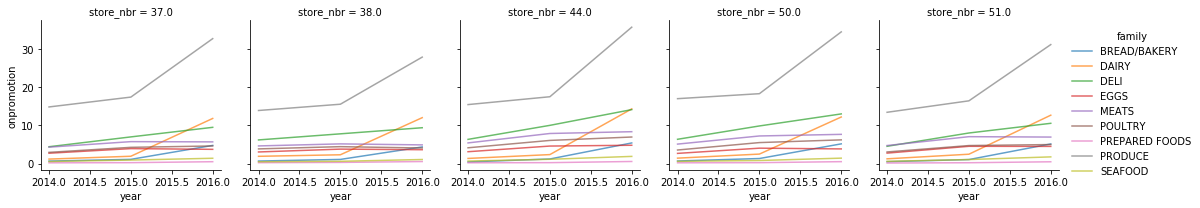

In [65]:
# see if on promotion strategy changes between years 
promo_date = pd.DataFrame(final_promo.groupby(['year', 'store_nbr', 'family'])['onpromotion'].mean().reset_index())

g = sns.FacetGrid(promo_date, col="store_nbr", hue="family")
g.map(plt.plot, "year", "onpromotion", alpha=.7)
g.add_legend();

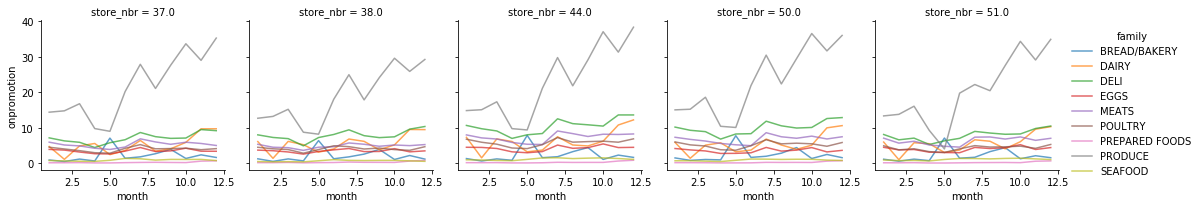

In [66]:
# see if on promotion strategy changes between months
promo_date = pd.DataFrame(final_promo.groupby(['month', 'store_nbr', 'family'])['onpromotion'].mean().reset_index())

g = sns.FacetGrid(promo_date, col="store_nbr", hue="family")
g.map(plt.plot, "month", "onpromotion", alpha=.7)
g.add_legend();

Finding: Looks like the promotion strategy increases from 2014 to 2016 and promotions change by month. I will replace the missing onpromotion values with onpromotion data available in the corresponding nearest month, to account for on promotions increasing across years and different family on promotion offers different months.

In [67]:
# Separate out data sets to be used

# data missing on promotion
final_13_may14 = final[(final['date'].dt.year == 2013) | ( (final['date'].dt.year == 2014) & (final['date'].dt.month < 4) )]

# data with nearest corresponding month
final_april14_mar15 = final[((final['date'].dt.year == 2014) & (final['date'].dt.month >=4)) \
                           | ((final['date'].dt.year == 2015) & (final['date'].dt.month <=3))]

# create on promotion as 1's and 0's and separate date into year, month, day
final_april14_mar15['onpromotion'] = np.where(final_april14_mar15['onpromotion'] == True, 1, 0)
final_april14_mar15['year'] = final_april14_mar15['date'].dt.year
final_april14_mar15['month'] = final_april14_mar15['date'].dt.month
final_april14_mar15['day'] = final_april14_mar15['date'].dt.day

In [68]:
# group by day, store number, and family and aggregate number of sales and onpromotion to get the fraction of 
# items onpromotion each day at each store - I will use this fraction to extrapolate an onpromotion value 
# for the missing onpromotion data
final_april14_mar152 = pd.DataFrame(final_april14_mar15.groupby(['year', 'month', 'day','store_nbr', 'family'])['onpromotion', 'unit_sales'].sum().reset_index())
final_april14_mar152['frac_promo'] = final_april14_mar152['onpromotion'] / final_april14_mar152['unit_sales']

In [69]:
# create dataframe with mean on promotion fraction for each store day and family
final_april14_mar153 = pd.DataFrame(final_april14_mar152.groupby(['year', 'month','store_nbr', 'family'])['frac_promo'].mean().reset_index())

In [70]:
# take the average fraction on promotion for each store per family per month
fraction = pd.DataFrame(final_april14_mar153.groupby(['store_nbr','family', 'month'])['frac_promo'].mean().reset_index())

In [71]:
# get daily unit sales of each store and family combination to add fraction on promotion to
final_13_may14 = pd.DataFrame(final_13_may14.groupby(['date', 'store_nbr', 'family'])['unit_sales'].sum().reset_index())
final_13_may14['month'] = final_13_may14['date'].dt.month

In [72]:
# merge data missing onpromotion with extrapolated onpromotion fraction
merged = pd.merge(final_13_may14, fraction, on= ['store_nbr','family', 'month'])
merged['onpromotion'] = merged['unit_sales']* merged['frac_promo']

In [73]:
# new dataset that has new values for average on promotion 
merged.drop(columns = ['month','frac_promo'], inplace=True)
merged

,date,store_nbr,family,unit_sales,onpromotion
0,2013-01-02,37.0,BREAD/BAKERY,554.995,1.209495
1,2013-01-03,37.0,BREAD/BAKERY,507.820,1.106687
2,2013-01-04,37.0,BREAD/BAKERY,442.936,0.965286
3,2013-01-05,37.0,BREAD/BAKERY,544.995,1.187702
4,2013-01-06,37.0,BREAD/BAKERY,547.844,1.193911
...,...,...,...,...,...
19880,2014-02-24,51.0,PRODUCE,5.000,0.242424
19881,2014-02-25,51.0,PRODUCE,7.000,0.339394
19882,2014-02-26,51.0,PRODUCE,9.000,0.436364
19883,2014-02-27,51.0,PRODUCE,8.000,0.387879


In [74]:
#separate out data from original final dataset that is missing onpromotion
final_with_promo = final[final['onpromotion'].notnull()]
missing_onpromo = final[final['onpromotion'].isna()]
final_with_promo['onpromotion'] = np.where(final_with_promo['onpromotion'] == True, 1, 0)

In [75]:
# create date, store, family grouped dataframe
missing_onpromo2 = pd.DataFrame(missing_onpromo.groupby(['date','store_nbr', 'family','precipMM','avgtemp','holiday'])['unit_sales'].sum().reset_index())

In [76]:
# merge missing promo data with data on promotion based on fraction
missing_with_promo = pd.merge(missing_onpromo2, merged, on = ['date','store_nbr','family','unit_sales'], how = 'outer')

In [77]:
# create date, store, family grouped dataframe
final_with_promo2 = pd.DataFrame(final_with_promo.groupby(['date','store_nbr', 'family','precipMM','avgtemp','holiday'])['unit_sales','onpromotion'].sum().reset_index())

In [78]:
# concat dataframes back to together
final_new = pd.concat([final_with_promo2, missing_with_promo], axis = 0)

In [79]:
# check that all missing values are gone
np.mean(final_new.isna(), axis = 0)

date           0.0
store_nbr      0.0
family         0.0
precipMM       0.0
avgtemp        0.0
holiday        0.0
unit_sales     0.0
onpromotion    0.0
dtype: float64

In [80]:
# Search if any duplicated rows
duplicated = final_new[final_new.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicated)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [date, store_nbr, family, precipMM, avgtemp, holiday, unit_sales, onpromotion]
Index: []


# EDA

Text(0, 0.5, 'unit_sales')

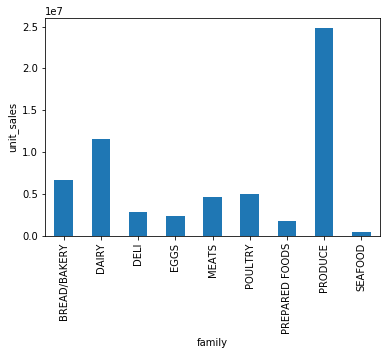

In [81]:
# How do sales vary by family?
final_new.groupby('family')['unit_sales'].sum().plot(kind='bar').set_ylabel('unit_sales')

Finding: Produce has the most sales followed by dairy, bread, poultry, meat, deli, eggs, prepared foods, and seafood.

Text(0, 0.5, 'unit_sales')

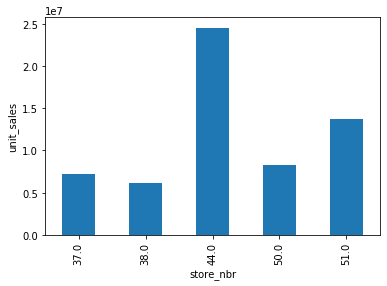

In [82]:
# How do total sales vary by store?
final_new.groupby('store_nbr')['unit_sales'].sum().plot(kind='bar').set_ylabel('unit_sales')

Finding: Store 44 has the most sales followed by store 51, store 50, store 37, and store 38.

BREAD/BAKERY


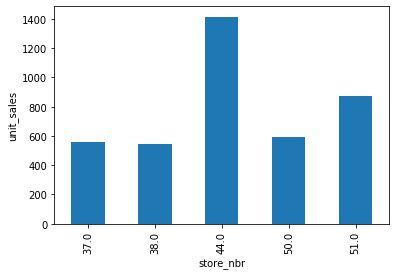

DAIRY


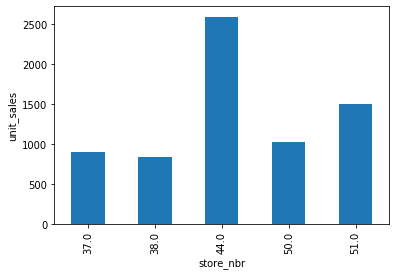

DELI


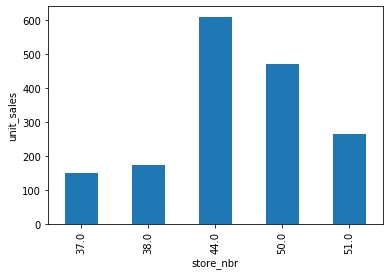

EGGS


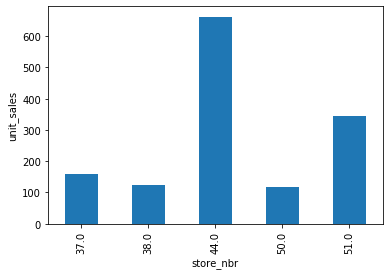

MEATS


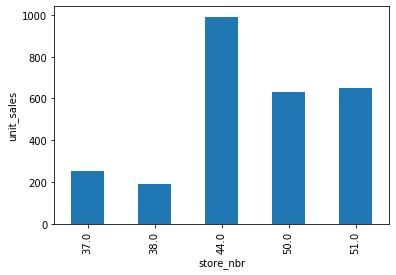

POULTRY


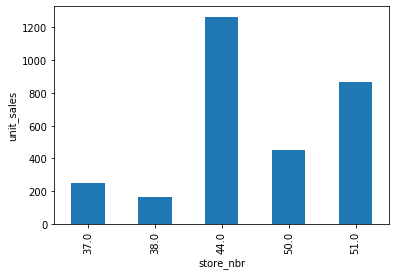

PREPARED FOODS


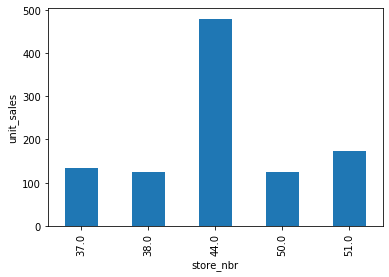

PRODUCE


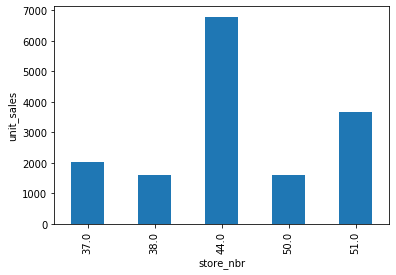

SEAFOOD


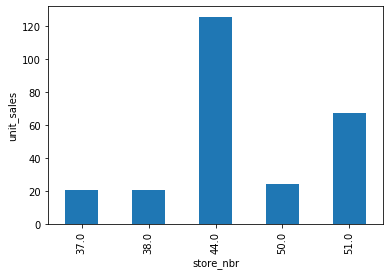

In [83]:
# how do average sales of each family vary between stores?
family = final_new['family'].unique()

for product in family:
    print(product)
    data = final_new[final_new['family'] == product]
    data.groupby(['store_nbr'])['unit_sales'].mean().plot(kind='bar').set_ylabel('unit_sales')
    plt.show()

Finding: Average sales of each family often varies between stores. Time series analysis separate for each store will make the most sense.

Text(0, 0.5, 'unit_sales')

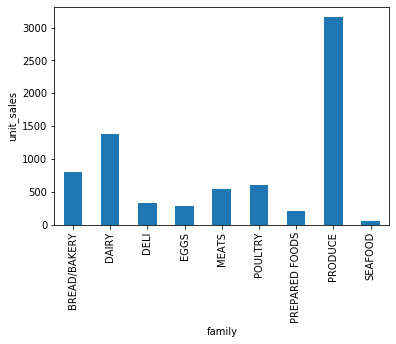

In [84]:
# how do average number of sales for each family compare to one another?
final_new.groupby('family')['unit_sales'].mean().plot(kind='bar').set_ylabel('unit_sales')

Finding: Average sales of each family is different compared to one another. Time series analysis separate for each product will make the most sense.

BREAD/BAKERY


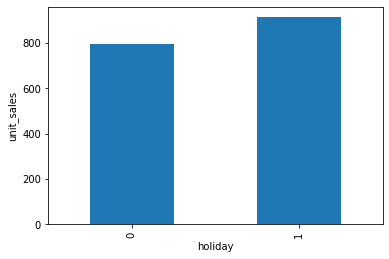

DAIRY


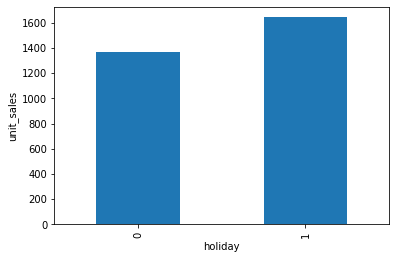

DELI


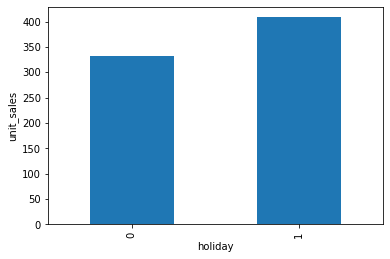

EGGS


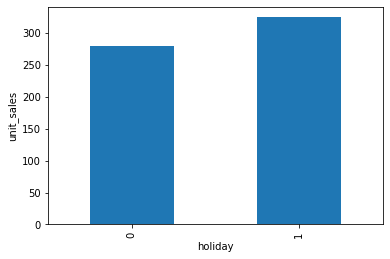

MEATS


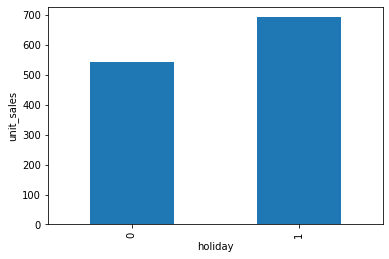

POULTRY


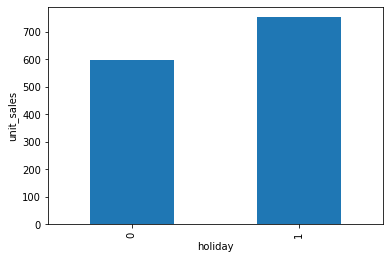

PREPARED FOODS


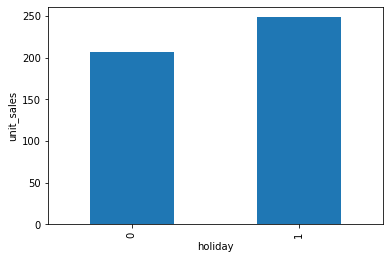

PRODUCE


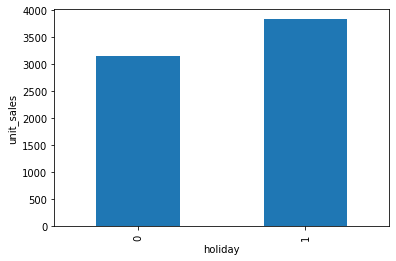

SEAFOOD


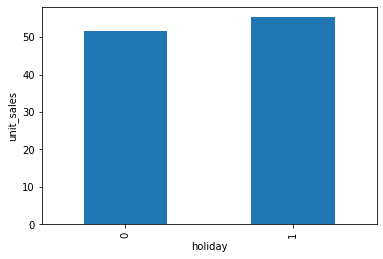

In [85]:
# Do holidays affect sales?
for product in family:
    print(product)
    data = final_new[final_new['family'] == product]
    data.groupby(['holiday'])['unit_sales'].mean().plot(kind='bar').set_ylabel('unit_sales')
    plt.show()

Finding: Sales of all products are higher on holidays

BREAD/BAKERY


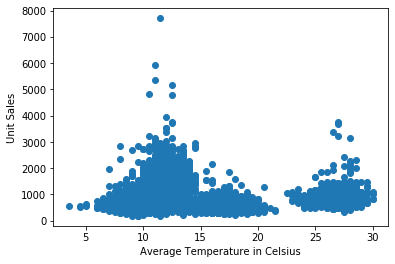

DAIRY


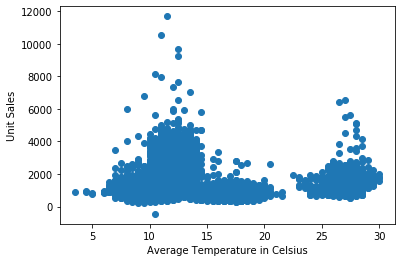

DELI


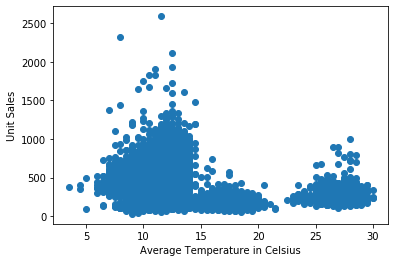

EGGS


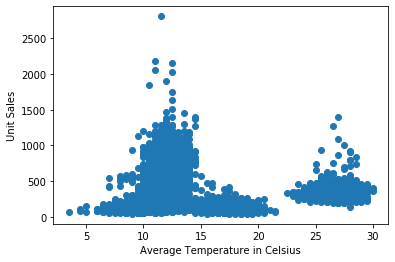

MEATS


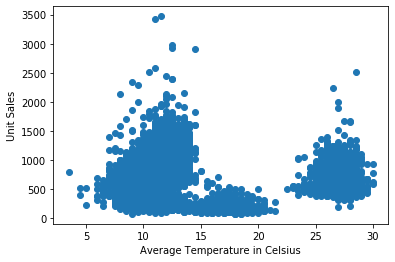

POULTRY


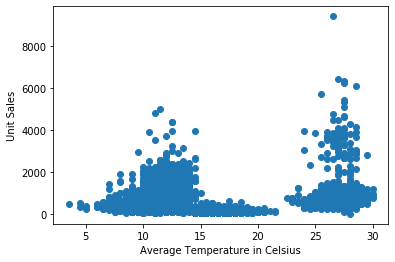

PREPARED FOODS


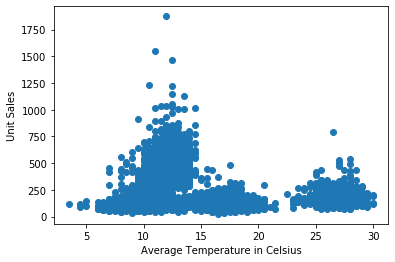

PRODUCE


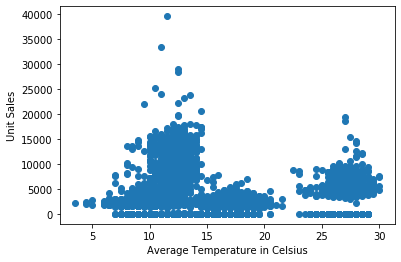

SEAFOOD


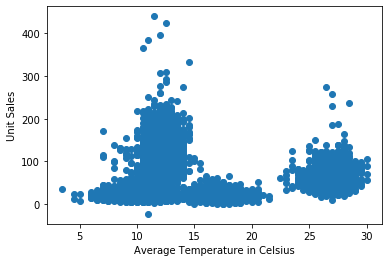

In [86]:
# Does temperature affect sales?
for product in family:
    print(product)
    data = final_new[final_new['family'] == product]
    plt.figure()
    plt.scatter(data['avgtemp'], data['unit_sales'])
    plt.xlabel('Average Temperature in Celsius')
    plt.ylabel('Unit Sales')
    plt.show()

Finding: it looks like sales may vary with temperature, with 2 peaks around 12 degrees celsius and 27 degrees celcius.

BREAD/BAKERY


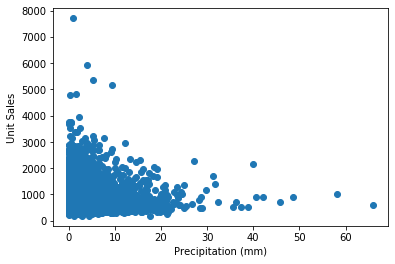

DAIRY


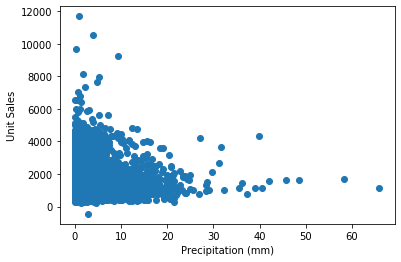

DELI


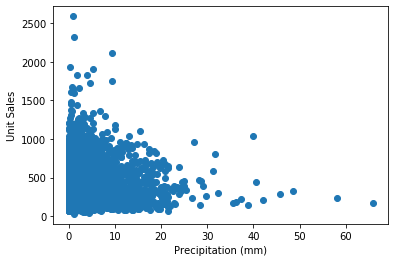

EGGS


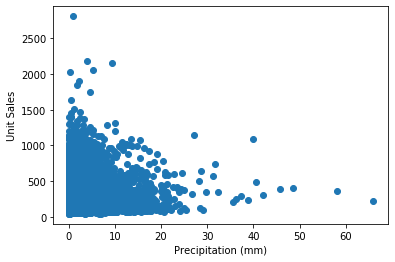

MEATS


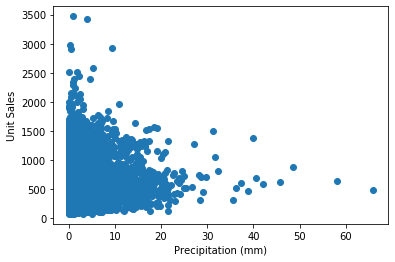

POULTRY


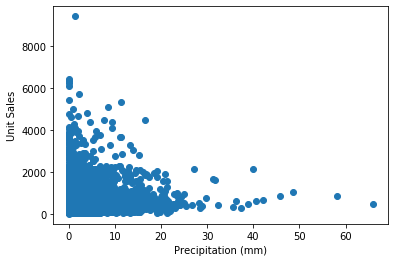

PREPARED FOODS


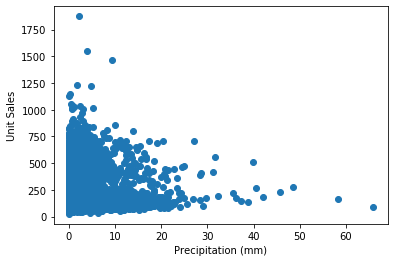

PRODUCE


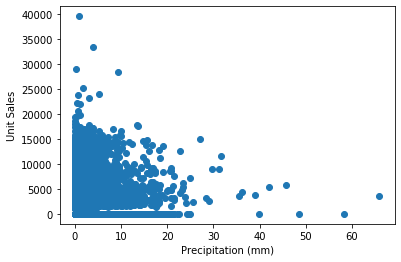

SEAFOOD


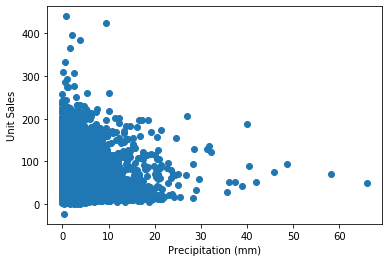

In [87]:
# Does rainfall affect sales?
for product in family:
    print(product)
    data = final_new[final_new['family'] == product]
    plt.figure()
    plt.scatter(data['precipMM'], data['unit_sales'])
    plt.xlabel('Precipitation (mm)')
    plt.ylabel('Unit Sales')
    plt.show()

Finding: it looks like sales may be lower when there is more rainfall

BREAD/BAKERY


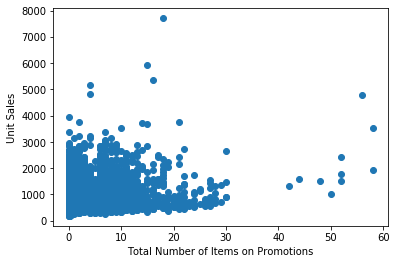

DAIRY


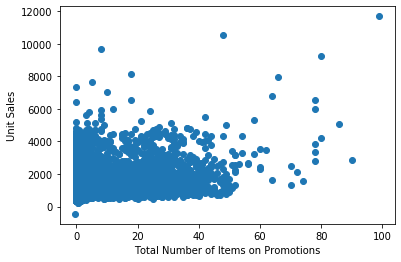

DELI


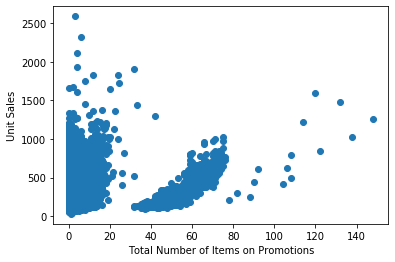

EGGS


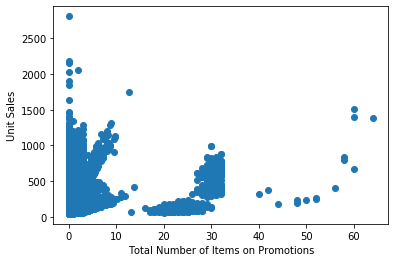

MEATS


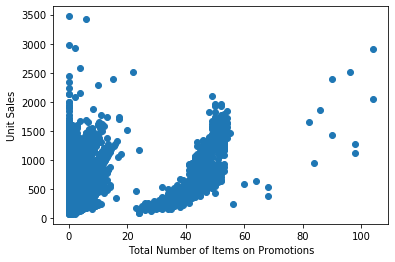

POULTRY


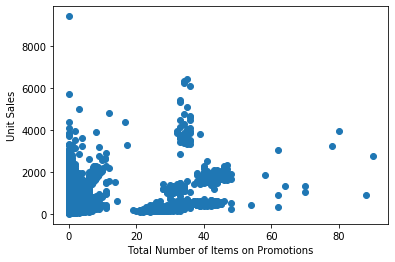

PREPARED FOODS


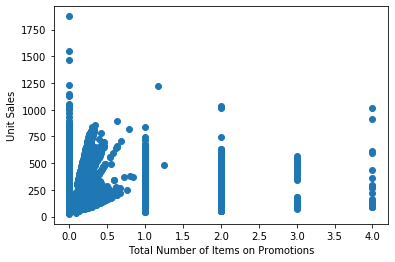

PRODUCE


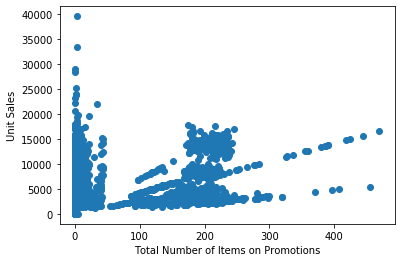

SEAFOOD


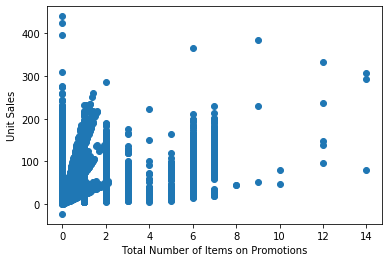

In [88]:
# Do promotions affect sales?
for product in family:
    print(product)
    data = final_new[final_new['family'] == product]
    plt.figure()
    plt.scatter(data['onpromotion'], data['unit_sales'])
    plt.xlabel('Total Number of Items on Promotions')
    plt.ylabel('Unit Sales')
    plt.show()

Finding: there is not a clear pattern for how promotions affect sales